In [35]:
import numpy as np
import pandas as pd

In [36]:
import matplotlib.pyplot as plt
dataset = pd.read_csv("files/insurance.csv")
print(dataset.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [37]:
#Splitting dataset into independant variables (age, sex, etc) and dependant variables (insurance costs).
X = dataset.iloc[:, 0:6].values
y = dataset.iloc[:, 6:7].values

In [38]:
X

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [39]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [40]:
# A neural network (and all other algorithms) require numbers/data, and cannot accept strings and words 
# as it will break the network. Therefore, any of the dependant variables that include words will be replaced with numbers.

from sklearn.preprocessing import LabelEncoder

labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_4 = LabelEncoder()
X[:, 4] = labelencoder_X_4.fit_transform(X[:, 4])

In [41]:
X

array([[19, 0, 27.9, 0, 1, 'southwest'],
       [18, 1, 33.77, 1, 0, 'southeast'],
       [28, 1, 33.0, 3, 0, 'southeast'],
       ...,
       [18, 0, 36.85, 0, 0, 'southeast'],
       [21, 0, 25.8, 0, 0, 'southwest'],
       [61, 0, 29.07, 0, 1, 'northwest']], dtype=object)

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(columnTransformer.fit_transform(X), dtype = str)

In [43]:
X = X[:, 1:]

In [44]:
X

array([['0.0', '0.0', '1.0', ..., '27.9', '0', '1'],
       ['0.0', '1.0', '0.0', ..., '33.77', '1', '0'],
       ['0.0', '1.0', '0.0', ..., '33.0', '3', '0'],
       ...,
       ['0.0', '1.0', '0.0', ..., '36.85', '0', '0'],
       ['0.0', '0.0', '1.0', ..., '25.8', '0', '0'],
       ['1.0', '0.0', '0.0', ..., '29.07', '0', '1']], dtype='<U6')

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler((0,1))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

In [48]:
X_train
y_train

array([[6.23484016e-01],
       [2.48941100e-04],
       [5.96817515e-01],
       ...,
       [6.85376919e-02],
       [8.37299132e-03],
       [5.81681118e-02]])

In [49]:
# Creating the Neural Network

import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
    
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 128, activation = 'relu'))
# Adding the second hidden layer
classifier.add(Dense(units = 64, activation = 'relu'))  
classifier.add(Dense(units = 32, activation = 'relu'))  
# Adding the output layer
classifier.add(Dense(units = 1, activation = 'linear'))
# Compiling the ANN
classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [50]:
# Evaluating the Neural Network
History = classifier.fit(x = X_train, y = y_train, batch_size = 128, epochs = 150, verbose = 0)

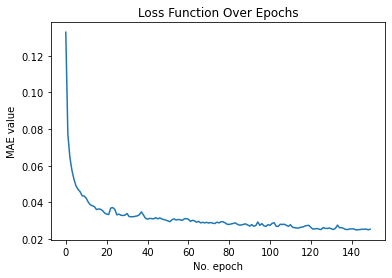

In [51]:
plt.plot(History.history['mean_absolute_error'])
plt.title('Loss Function Over Epochs')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.show()

In [52]:
y_pred = classifier.predict(X_test)

y_predInverse = sc.inverse_transform(y_pred)
y_testInverse = sc.inverse_transform(y_test)

9/9 [==============================] - 0s 2ms/step


In [ ]:
# Improving the Neural Network using GridSearchCV

In [62]:
def buildModel(optimizer):
    # Initialising the ANN
    classifier = Sequential()
    
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 128, activation = 'relu'))
    
    # Adding the second hidden layer
    classifier.add(Dense(units = 64, activation = 'relu'))
    
    
    classifier.add(Dense(units = 32, activation = 'relu'))
    
    # Adding the output layer
    classifier.add(Dense(units = 1, activation = 'linear'))
    
    # Compiling the ANN
    classifier.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    
    return classifier

In [63]:
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

classifier = KerasRegressor(build_fn = buildModel)
#What hyperparameter we want to play with
parameters = {'batch_size': [16, 32, 64, 128],
              'epochs': [100, 150],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 5)
grid_search = grid_search.fit(X_train, y_train, verbose = 0)

C:\Users\Akash\AppData\Local\Temp/ipykernel_25536/4029004524.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasRegressor(build_fn = buildModel)


2/2 [==============================] - 0s 4ms/step


In [64]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: " + str(best_parameters))

Best Parameters: {'batch_size': 16, 'epochs': 100, 'optimizer': 'adam'}


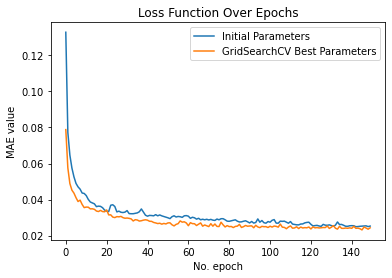

In [65]:
bestClassifier = buildModel('adam')
HistoryBest = bestClassifier.fit(x = X_train, y = y_train, batch_size = 16, epochs =150 , verbose = 0)
plt.plot(History.history['mean_absolute_error'], label='Initial Parameters')
plt.plot(HistoryBest.history['mean_absolute_error'], label='GridSearchCV Best Parameters')
plt.title('Loss Function Over Epochs')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [66]:
from sklearn.metrics import mean_absolute_error 

print("Initial Classifier MAE: " + str(mean_absolute_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average')))
print("Best Classifier MAE: " + str(mean_absolute_error(y_test, bestClassifier.predict(X_test), sample_weight=None, multioutput='uniform_average')))

Initial Classifier MAE: 0.027671607796175935
9/9 [==============================] - 0s 1ms/step
Best Classifier MAE: 0.026513705309550432


In [67]:
y_predBestInverse = sc.inverse_transform(bestClassifier.predict(X_test))

combinedArray = np.column_stack((y_testInverse[0:10],y_predInverse[0:10], y_predBestInverse[0:10]))
print("Actual Charge   Initial         Best ")
s = [[str(e) for e in row] for row in np.around(combinedArray, 2)]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print ('\n'.join(table))

9/9 [==============================] - 0s 1ms/step
Actual Charge   Initial         Best 
9724.53 	9536.7  	9681.72 
8547.69 	8358.54 	8508.16 
45702.02	48600.56	45263.3 
12950.07	13144.49	12688.06
9644.25 	10014.91	9553.31 
4500.34 	4522.62 	4358.33 
2198.19 	2199.0  	2154.35 
11436.74	11685.79	11356.53
7537.16 	7657.65 	7485.88 
5425.02 	5918.06 	5584.57 
